# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">inpainting تصاویر</div>


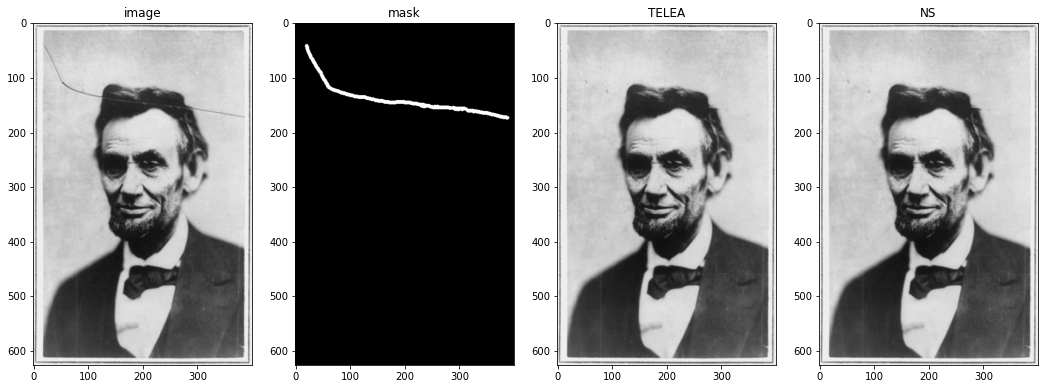

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("images/Lincoln.jpg")
mask = cv2.imread("images/inpaintMask.png",0) #single channel

res_telea = cv2.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
res_ns = cv2.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv2.INPAINT_NS)


plt.figure(figsize=[18,7])
plt.subplot(141);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(142);plt.imshow(mask, cmap='gray');plt.title("mask");
plt.subplot(143);plt.imshow(res_telea[...,::-1]);plt.title("TELEA");
plt.subplot(144);plt.imshow(res_ns[...,::-1]);plt.title("NS");

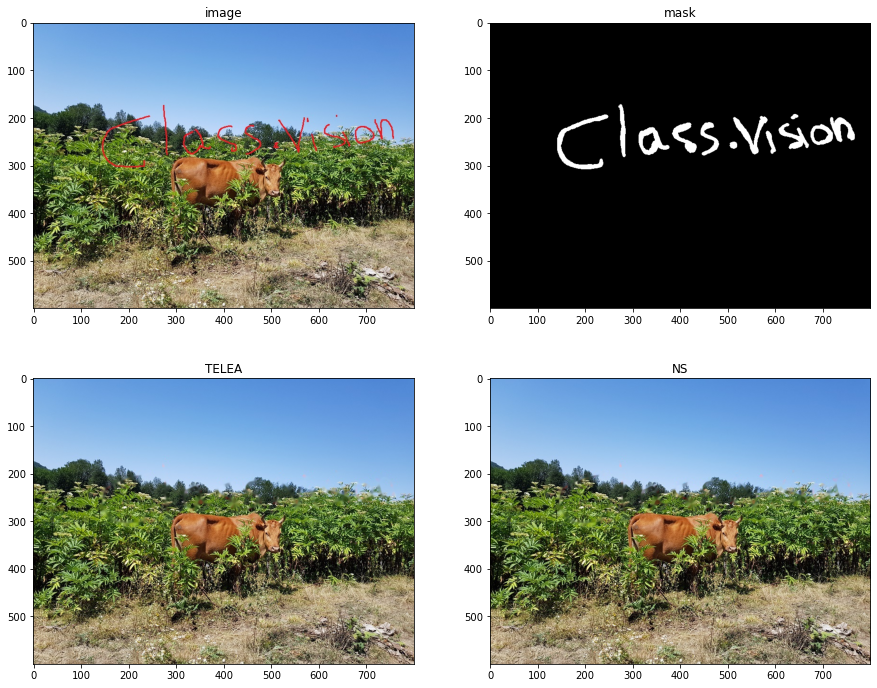

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("images/input-inpaint.jpg")
mask = cv2.imread("images/input_inpaintMask.png",0) #single channel

res_telea = cv2.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
res_ns = cv2.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv2.INPAINT_NS)


plt.figure(figsize=[15,12])
plt.subplot(221);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(222);plt.imshow(mask, cmap='gray');plt.title("mask");
plt.subplot(223);plt.imshow(res_telea[...,::-1]);plt.title("TELEA");
plt.subplot(224);plt.imshow(res_ns[...,::-1]);plt.title("NS");

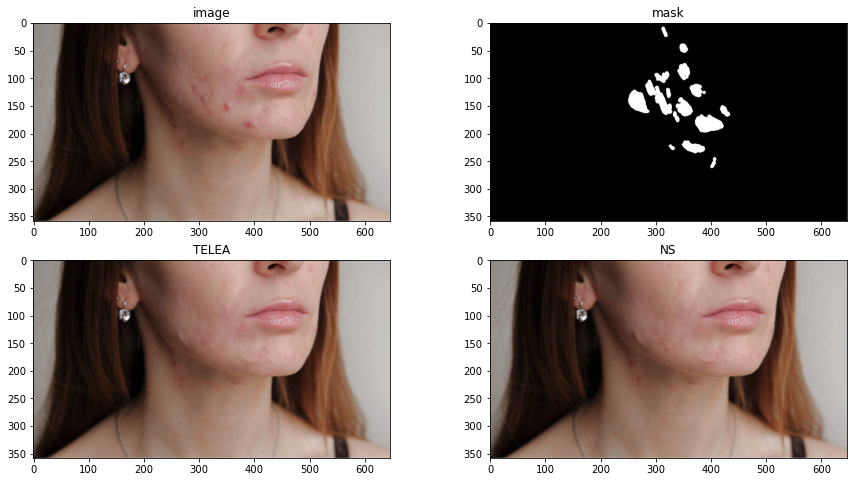

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("images/blemish.png")
mask = cv2.imread("images/blemishMask.png",0) #single channel

res_telea = cv2.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
res_ns = cv2.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv2.INPAINT_NS)


plt.figure(figsize=[15,8])
plt.subplot(221);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(222);plt.imshow(mask, cmap='gray');plt.title("mask");
plt.subplot(223);plt.imshow(res_telea[...,::-1]);plt.title("TELEA");
plt.subplot(224);plt.imshow(res_ns[...,::-1]);plt.title("NS");

In [5]:
import numpy as np
import cv2 as cv

# OpenCV Utility Class for Mouse Handling
class Sketcher:
    def __init__(self, windowname, dests, colors_func):
        self.prev_pt = None
        self.windowname = windowname
        self.dests = dests
        self.colors_func = colors_func
        self.dirty = False
        self.show()
        cv.setMouseCallback(self.windowname, self.on_mouse)

    def show(self):
        cv.imshow(self.windowname, self.dests[0])
        cv.imshow(self.windowname + ": mask", self.dests[1])

    # onMouse function for Mouse Handling
    def on_mouse(self, event, x, y, flags, param):
        pt = (x, y)
        if event == cv.EVENT_LBUTTONDOWN:
            self.prev_pt = pt
        elif event == cv.EVENT_LBUTTONUP:
            self.prev_pt = None

        if self.prev_pt and flags & cv.EVENT_FLAG_LBUTTON:
            for dst, color in zip(self.dests, self.colors_func()):
                cv.line(dst, self.prev_pt, pt, color, 5)
            self.dirty = True
            self.prev_pt = pt
            self.show()


# Read image in color mode
img = cv.imread("images/blemish.png", cv.IMREAD_COLOR)

# Create a copy of original image
img_mask = img.copy()
# Create a black copy of original image
# Acts as a mask
inpaintMask = np.zeros(img.shape[:2], np.uint8)
# Create sketch using OpenCV Utility Class: Sketcher
sketch = Sketcher('image', [img_mask, inpaintMask], lambda : ((255, 255, 255), 255))

while True:
    ch = cv.waitKey()
    if ch == 27:
        break
    if ch == ord('t'):
        # Use Algorithm proposed by Alexendra Telea: Fast Marching Method (2004)
        # Reference: https://pdfs.semanticscholar.org/622d/5f432e515da69f8f220fb92b17c8426d0427.pdf
        res = cv.inpaint(src=img_mask, inpaintMask=inpaintMask, inpaintRadius=3, flags=cv.INPAINT_TELEA)
        cv.imshow('Inpaint Output using FMM', res)
    if ch == ord('n'):
        # Use Algorithm proposed by Bertalmio, Marcelo, Andrea L. Bertozzi, and Guillermo Sapiro: Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting (2001)
        res = cv.inpaint(src=img_mask, inpaintMask=inpaintMask, inpaintRadius=3, flags=cv.INPAINT_NS)
        cv.imshow('Inpaint Output using NS Technique', res)
    if ch == ord('r'):
        img_mask[:] = img
        inpaintMask[:] = 0
        sketch.show()

print('Completed')
cv.destroyAllWindows()
cv2.imwrite("inpaintMask.png",inpaintMask)

Completed


True

Additional Resources

    Bertalmio, Marcelo, Andrea L. Bertozzi, and Guillermo Sapiro. "Navier-stokes, fluid dynamics, and image and video inpainting." In Computer Vision and Pattern Recognition, 2001. CVPR 2001. Proceedings of the 2001 IEEE Computer Society Conference on, vol. 1, pp. I-355. IEEE, 2001.
    
    Telea, Alexandru. "An image inpainting technique based on the fast marching method." Journal of graphics tools 9.1 (2004): 23-34.

https://learnopencv.com/image-inpainting-with-opencv-c-python/

https://docs.opencv.org/3.4/df/d3d/tutorial_py_inpainting.html